In [ ]:
import cv2
import os 
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD,Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from numpy import random
x = random.randint(1,size=(6))
print(x)

[0 0 0 0 0 0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = []
path = r'/content/drive/MyDrive/LIBRAS/merged.zip (Unzipped Files)/merged'

X = ImageDataGenerator(
                       rescale=(1/255),
                       horizontal_flip=True,
                       validation_split=0.2
                       )

train = X.flow_from_directory(
                            directory=path, 
                            target_size=(50,50), 
                            class_mode='categorical',
                            batch_size=10,
                            subset='training',
                            )

X = ImageDataGenerator(
                      rescale=(1/255),
                      validation_split=0.2)             
test = X.flow_from_directory(
                            directory=path, 
                            target_size=(50,50), 
                            class_mode='categorical',
                            batch_size=10,
                            subset='validation',
                            )

train_step = train.n//train.batch_size
test_step = test.n//test.batch_size

Found 3072 images belonging to 32 classes.
Found 768 images belonging to 32 classes.


(10, 50, 50, 3)


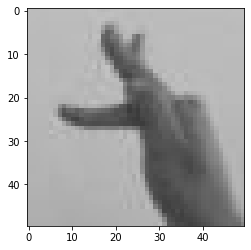

(10, 50, 50, 3)


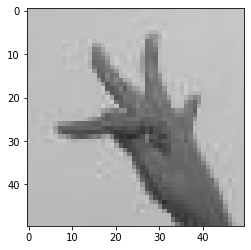

(10, 50, 50, 3)


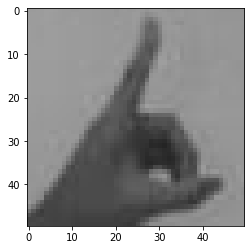

(10, 50, 50, 3)


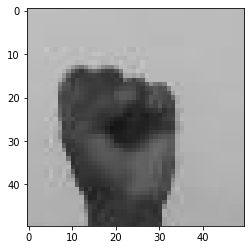

(10, 50, 50, 3)


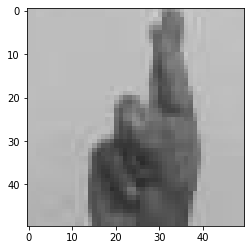

In [ ]:
for i in range(5):
  img, label = train.next()
  print(img.shape)
  plt.imshow(img[0])
  plt.show()


(10, 50, 50, 3)


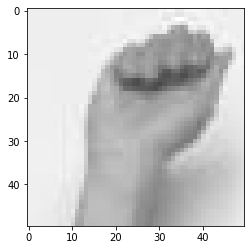

(10, 50, 50, 3)


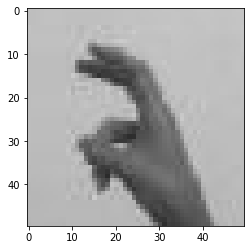

(10, 50, 50, 3)


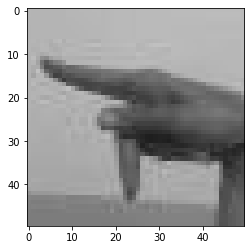

(10, 50, 50, 3)


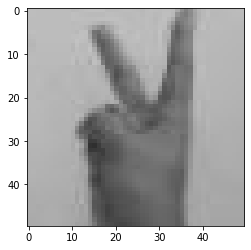

(10, 50, 50, 3)


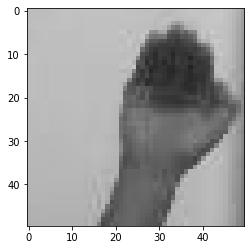

In [ ]:
for i in range(5):
  img, label = test.next()
  print(img.shape)
  plt.imshow(img[0])
  plt.show()

In [ ]:
d = {}
for i in range(32):
    d[i] = list(train.class_indices.keys())[i]
print(d)

{0: '1', 1: '2', 2: '4', 3: '5', 4: '7', 5: '9', 6: 'A', 7: 'Adulto', 8: 'Aviao', 9: 'B', 10: 'C', 11: 'D', 12: 'E', 13: 'F', 14: 'G', 15: 'I', 16: 'L', 17: 'M', 18: 'N', 19: 'O', 20: 'P', 21: 'Palavra', 22: 'Pequeno', 23: 'Q', 24: 'R', 25: 'S', 26: 'T', 27: 'U', 28: 'V', 29: 'W', 30: 'X', 31: 'Y'}


In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(50,50,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(32,activation ="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train, steps_per_epoch=train_step, validation_data=test,validation_steps=test_step,epochs=10)

model.save('/content/drive/MyDrive/LIBRAS/a3.h5')

Epoch 1/10
307/307 [==============================] - 18s 58ms/step - loss: 3.3083 - accuracy: 0.1143 - val_loss: 2.9519 - val_accuracy: 0.1513
Epoch 2/10
307/307 [==============================] - 18s 58ms/step - loss: 1.9954 - accuracy: 0.5745 - val_loss: 1.2015 - val_accuracy: 0.7211
Epoch 3/10
307/307 [==============================] - 18s 59ms/step - loss: 0.8242 - accuracy: 0.8220 - val_loss: 0.6890 - val_accuracy: 0.8421
Epoch 4/10
307/307 [==============================] - 18s 58ms/step - loss: 0.5192 - accuracy: 0.8746 - val_loss: 0.5707 - val_accuracy: 0.8553
Epoch 5/10
307/307 [==============================] - 18s 58ms/step - loss: 0.3769 - accuracy: 0.9102 - val_loss: 0.4298 - val_accuracy: 0.9105
Epoch 6/10
307/307 [==============================] - 18s 58ms/step - loss: 0.3107 - accuracy: 0.9255 - val_loss: 0.3673 - val_accuracy: 0.9079
Epoch 7/10
307/307 [==============================] - 20s 64ms/step - loss: 0.2551 - accuracy: 0.9415 - val_loss: 0.3295 - val_accuracy:

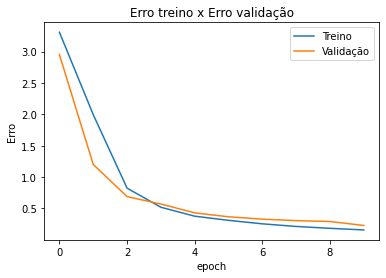

In [ ]:
plt.plot(history.history['loss'], label = 'Treino')
plt.plot(history.history['val_loss'], label = 'Validação')
plt.title('Erro treino x Erro validação')
plt.ylabel('Erro')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
d = {}
for i in range(32):
    d[i] = list(train.class_indices.keys())[i]
print(d)

{0: '1', 1: '2', 2: '4', 3: '5', 4: '7', 5: '9', 6: 'A', 7: 'Adulto', 8: 'Aviao', 9: 'B', 10: 'C', 11: 'D', 12: 'E', 13: 'F', 14: 'G', 15: 'I', 16: 'L', 17: 'M', 18: 'N', 19: 'O', 20: 'P', 21: 'Palavra', 22: 'Pequeno', 23: 'Q', 24: 'R', 25: 'S', 26: 'T', 27: 'U', 28: 'V', 29: 'W', 30: 'X', 31: 'Y'}


In [ ]:
img = cv2.imread('/content/drive/MyDrive/LIBRAS/1.PNG')
img = np.reshape(img,(1,img.shape[0],img.shape[1],3))
pred = model.predict(img)
print(d[np.argmax(pred)], max(pred[0])*100)
img = cv2.imread('/content/drive/MyDrive/LIBRAS/4.PNG')
img = np.reshape(img,(1,img.shape[0],img.shape[1],3))
pred = model.predict(img)
print(d[np.argmax(pred)], max(pred[0])*100)
img = cv2.imread('/content/drive/MyDrive/LIBRAS/e.PNG')
img = np.reshape(img,(1,img.shape[0],img.shape[1],3))
pred = model.predict(img)
print(d[np.argmax(pred)], max(pred[0])*100)
img = cv2.imread('/content/drive/MyDrive/LIBRAS/o.PNG')
img = np.reshape(img,(1,img.shape[0],img.shape[1],3))
pred = model.predict(img)
print(d[np.argmax(pred)], max(pred[0])*100)
img = cv2.imread('/content/drive/MyDrive/LIBRAS/c.PNG')
img = np.reshape(img,(1,img.shape[0],img.shape[1],3))
pred = model.predict(img)
print(d[np.argmax(pred)], max(pred[0])*100)


1 100.0
1 100.0
B 100.0
A 100.0
C 100.0
